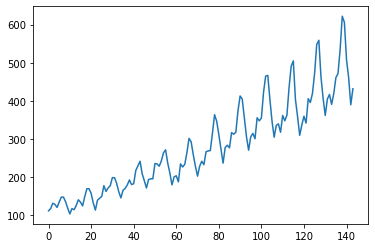

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dense, Activation, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
tf.random.set_seed(7)

In [5]:

dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [15]:
train

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

100 44


In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
trainY

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
       0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
       0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557,
       0.04054055, 0.08687258, 0.12741312, 0.12741312, 0.10424709,
       0.05598456, 0.01930502, 0.06949806, 0.07915059, 0.08880308,
       0.14285713, 0.11389962, 0.13127413, 0.14285713, 0.18339768,
       0.18339768, 0.15444016, 0.11196911, 0.08108109, 0.1196911 ,
       0.12934363, 0.14671814, 0.17181468, 0.14864865, 0.15250966,
       0.22007722, 0.24324325, 0.26640925, 0.2027027 , 0.16795367,
       0.13127413, 0.17374519, 0.17760617, 0.17760617, 0.25482625,
       0.25289574, 0.24131274, 0.26833975, 0.3088803 , 0.32432434,
       0.25675675, 0.20656371, 0.14671814, 0.18725869, 0.19305018,
       0.16216215, 0.25289574, 0.23745173, 0.25096524, 0.3088803 ,
       0.38223937, 0.36486486, 0.2992278 , 0.24131274, 0.1911197 ,
       0.24131274, 0.26640925, 0.24903473, 0.31467178, 0.31853

In [20]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
# create and fit the LSTM network
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
98/98 - 0s - loss: 0.0914 - 464ms/epoch - 5ms/step
Epoch 2/100
98/98 - 0s - loss: 0.0386 - 69ms/epoch - 706us/step
Epoch 3/100
98/98 - 0s - loss: 0.0311 - 65ms/epoch - 662us/step
Epoch 4/100
98/98 - 0s - loss: 0.0278 - 57ms/epoch - 586us/step
Epoch 5/100
98/98 - 0s - loss: 0.0246 - 48ms/epoch - 487us/step
Epoch 6/100
98/98 - 0s - loss: 0.0222 - 53ms/epoch - 537us/step
Epoch 7/100
98/98 - 0s - loss: 0.0195 - 79ms/epoch - 805us/step
Epoch 8/100
98/98 - 0s - loss: 0.0171 - 54ms/epoch - 556us/step
Epoch 9/100
98/98 - 0s - loss: 0.0151 - 109ms/epoch - 1ms/step
Epoch 10/100
98/98 - 0s - loss: 0.0132 - 56ms/epoch - 576us/step
Epoch 11/100
98/98 - 0s - loss: 0.0117 - 102ms/epoch - 1ms/step
Epoch 12/100
98/98 - 0s - loss: 0.0101 - 64ms/epoch - 650us/step
Epoch 13/100
98/98 - 0s - loss: 0.0087 - 67ms/epoch - 684us/step
Epoch 14/100
98/98 - 0s - loss: 0.0076 - 65ms/epoch - 659us/step
Epoch 15/100
98/98 - 0s - loss: 0.0065 - 78ms/epoch - 794us/step
Epoch 16/100
98/98 - 0s - loss: 0.005

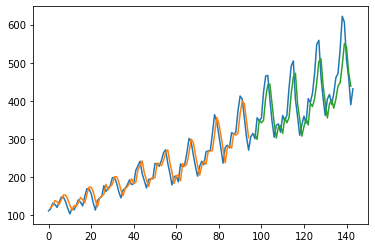

In [29]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()